Week 5 · Day 4 — Build a Neural Net in PyTorch from Scratch
Why this matters

This is where deep learning becomes practical. You’ll see how PyTorch handles layers, activations, and training loops — the same structure used in GPT or ResNet, just scaled up.

Theory Essentials

nn.Module: base class for neural nets in PyTorch.

Layers: nn.Linear, nn.ReLU, nn.Sigmoid, etc.

Forward pass: defined in forward(self, x).

Loss functions: in torch.nn (e.g. MSELoss, CrossEntropyLoss).

Optimizers: in torch.optim (e.g. SGD, Adam).

Training loop = forward → loss → backward → step → zero_grad.

Learned weights: [Parameter containing:
tensor([[ 0.1564],
        [-0.9117],
        [ 0.1243],
        [-0.6294],
        [ 1.2598],
        [-0.5278],
        [-0.0693],
        [-0.8713],
        [-0.7037],
        [-0.5654]], requires_grad=True), Parameter containing:
tensor([-0.3423, -0.7454,  1.0358, -0.1065,  1.1010,  0.5285, -0.8468,  0.8721,
        -0.2462, -0.4068], requires_grad=True), Parameter containing:
tensor([[-0.2625, -0.2951,  0.4844, -0.1305,  1.4643, -0.6282,  0.2348, -0.8313,
         -0.1202,  0.0490]], requires_grad=True), Parameter containing:
tensor([0.9719], requires_grad=True)]


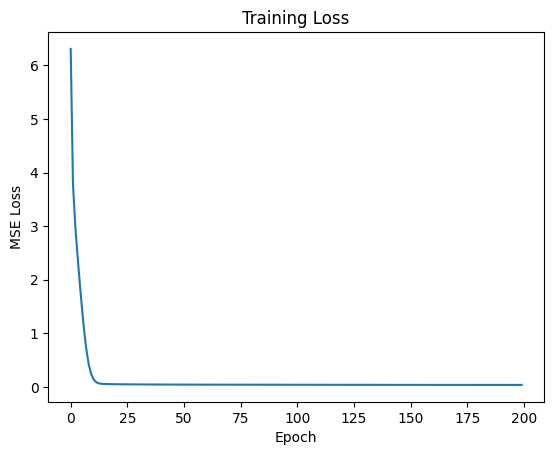

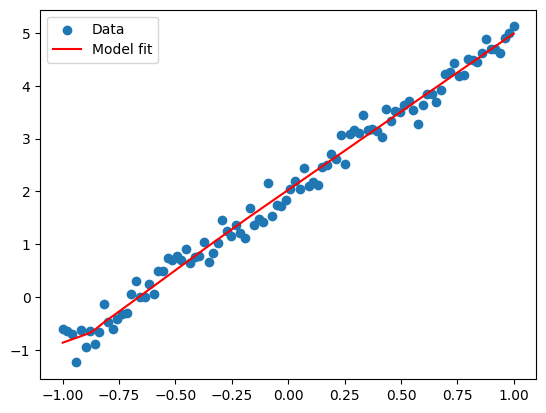

In [13]:
# Setup
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

torch.manual_seed(42)

# ---------- Synthetic dataset ----------
X = torch.linspace(-1, 1, 100).unsqueeze(1)         # shape (100,1)
y = 3*X + 2 + 0.2*torch.randn(X.size())             # y = 3x+2+noise

# ---------- Define model ----------
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(1, 10)  # input -> hidden
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(10, 1)  # hidden -> output

    def forward(self, x):
        x = self.layer1(x)
        x = self.act1(x)
        x = self.layer2(x)
        return x

model = SimpleNN()

# ---------- Loss & Optimizer ----------
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# ---------- Training loop ----------
losses = []
for epoch in range(200):
    y_pred = model(X)               # forward
    loss = criterion(y_pred, y)     # compute loss
    optimizer.zero_grad()           # clear grads
    loss.backward()                 # backprop
    optimizer.step()                # update weights
    losses.append(loss.item())

# ---------- Results ----------
print("Learned weights:", list(model.parameters()))

plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch"); plt.ylabel("MSE Loss")
plt.show()

# Plot fit
plt.scatter(X, y, label="Data")
plt.plot(X.detach(), y_pred.detach(), color="red", label="Model fit")
plt.legend(); plt.show()


Layer 1 (nn.Linear(1, 10))

Weights: shape (10,1) → 10 rows, each row is the weight for one hidden neuron (since there’s only 1 input feature).

That’s why you see ~10 numbers stacked vertically.

Biases: shape (10,) → one bias per hidden neuron → 10 numbers.

So layer1 contributes 10 weights + 10 biases.

Layer 2 (nn.Linear(10, 1))

Weights: shape (1,10) → 1 output neuron connected to all 10 hidden neurons → 10 numbers in one row.

Bias: shape (1,) → one bias for the output neuron.

So layer2 contributes 10 weights + 1 bias.

1) Core (10–15 min)
Task: Change hidden size to 5 and 50. Compare fit quality and training loss.

-With smaller hidden size we have a straight line through the data and we have a sort of exponential decay curve in training loss.

-With higher hidden size the curve becomes wiggly as it overfits. The training loss is almost a straight L. Faster convergence.

### 1. What convergence means


* A model **converges** when training loss (and ideally validation loss) stops decreasing and stabilizes.
* That means the weights have settled into values that fit the data well.

---

### 2. What convergence speed means

* It’s about **how quickly** the model reaches that stable low loss.
* If the model converges fast, the loss curve drops steeply at the beginning and flattens sooner.
* If it converges slowly, the curve decreases very gradually.

---

### 3. Factors that affect convergence speed

* **Learning rate**:

  * Too small → slow convergence (flat curve, many epochs).
  * Too big → may bounce around or diverge.
* **Optimizer choice**: SGD vs Adam, etc.
* **Architecture**: more layers/neurons can converge faster or slower.
* **Regularization/noise**: more noise or stronger penalties can slow down convergence.

---

### 4. Graph interpretation

* Yes ✅ — in the training loss graph, **faster convergence = steeper initial slope** (loss drops quickly in early epochs).
* But careful: fast isn’t always better → sometimes a model that converges more slowly reaches a better final point (global minimum instead of local).

2) Practice (10–15 min)
Task: Switch optimizer to Adam. Compare convergence speed with SGD.

SGD is more smooth and looks stable. Adam has a steep drop and oscillates before stabilizing.

3) Stretch (optional, 10–15 min)
Task: Add another hidden layer (nn.Linear(10,10)) with ReLU. Does deeper help here?

Learned weights: [Parameter containing:
tensor([[ 0.1564],
        [-0.8628],
        [-0.0992],
        [-0.8868],
        [ 0.8374],
        [-0.3592],
        [-0.0693],
        [-1.2645],
        [-0.7259],
        [-0.5179]], requires_grad=True), Parameter containing:
tensor([-3.4230e-01, -8.0720e-01,  7.3133e-01,  8.9247e-04,  8.9699e-01,
         3.5720e-01, -8.4680e-01,  1.2420e+00, -2.8005e-01, -4.5807e-01],
       requires_grad=True), Parameter containing:
tensor([[-0.2625, -0.3144,  0.0411, -0.0691,  0.0393, -0.2637,  0.2348, -0.2461,
         -0.0546,  0.0661],
        [ 0.1633,  0.2553,  0.3074, -0.2533,  0.1633, -0.1552, -0.0347, -0.2987,
          0.2880, -0.2321],
        [ 0.1690,  0.1111,  0.0497, -0.1710,  0.1885,  0.0671,  0.0407, -0.2794,
          0.1327, -0.0474],
        [-0.1449,  0.2716,  0.0705, -0.1750, -0.1601, -0.0151,  0.1766, -0.0808,
         -0.1804, -0.1083],
        [-0.2362,  0.1093,  0.1640, -0.5260,  0.8106, -0.2148,  0.0573, -1.0904,
          0.

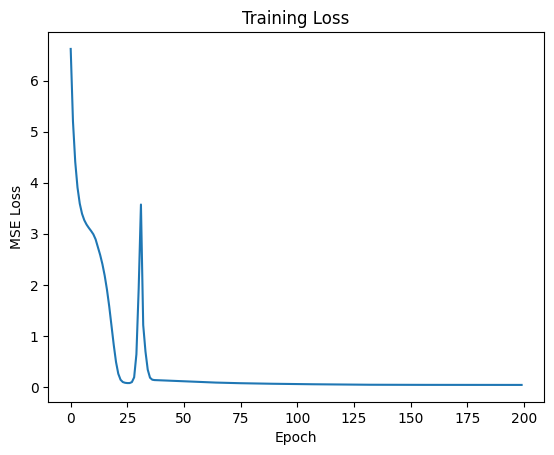

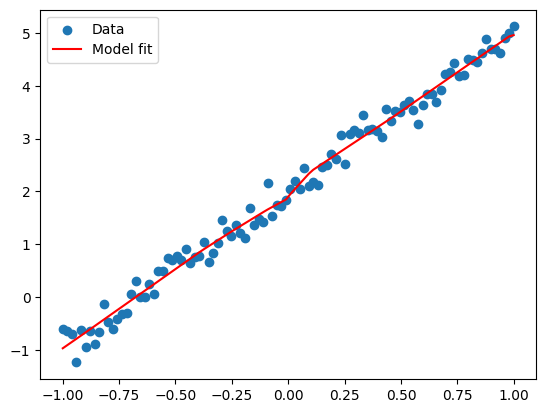

In [14]:
# Setup
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

torch.manual_seed(42)

# ---------- Synthetic dataset ----------
X = torch.linspace(-1, 1, 100).unsqueeze(1)         # shape (100,1)
y = 3*X + 2 + 0.2*torch.randn(X.size())             # y = 3x+2+noise

# ---------- Define model ----------
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(1, 10)  # input -> hidden
        self.act1 = nn.ReLU()
        self.layer2 = nn.Linear(10, 10)  # hidden -> hidden
        self.act2 = nn.ReLU()
        self.layer3 = nn.Linear(10, 1)  # hidden -> output

    def forward(self, x):
        x = self.layer1(x)
        x = self.act1(x)
        x = self.layer2(x)
        x = self.act2(x)
        x = self.layer3(x)
        return x

model = SimpleNN()

# ---------- Loss & Optimizer ----------
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# ---------- Training loop ----------
losses = []
for epoch in range(200):
    y_pred = model(X)               # forward
    loss = criterion(y_pred, y)     # compute loss
    optimizer.zero_grad()           # clear grads
    loss.backward()                 # backprop
    optimizer.step()                # update weights
    losses.append(loss.item())

# ---------- Results ----------
print("Learned weights:", list(model.parameters()))

plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch"); plt.ylabel("MSE Loss")
plt.show()

# Plot fit
plt.scatter(X, y, label="Data")
plt.plot(X.detach(), y_pred.detach(), color="red", label="Model fit")
plt.legend(); plt.show()


-Adding another layer clearly didn't help.
Key takeaway

Shallow net (1 hidden layer) → enough to learn linear patterns.

Deeper net (2+ hidden layers) → useful for nonlinear, complex relationships (curves, images, text).

For simple data, more depth just adds noise, instability, and slower convergence.

Mini-Challenge (≤40 min)

Task: Build a PyTorch net to classify the 2D blobs dataset (from earlier weeks).
Acceptance Criteria:

Use make_blobs with 2 centers.

Define a small nn.Module (2 → 8 → 1 with ReLU + Sigmoid).

Train with BCELoss (binary cross-entropy).

Plot decision boundary after training.

Report accuracy.

Final loss: 0.0000
Accuracy: 100.00%


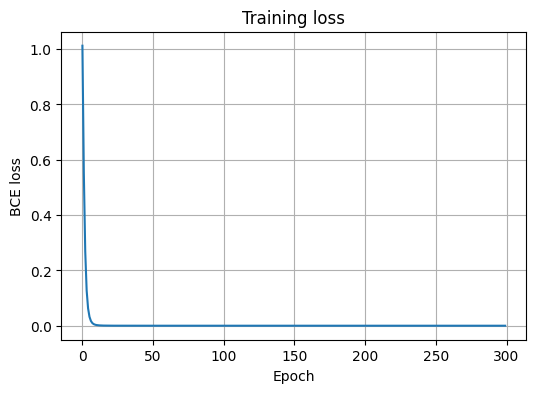

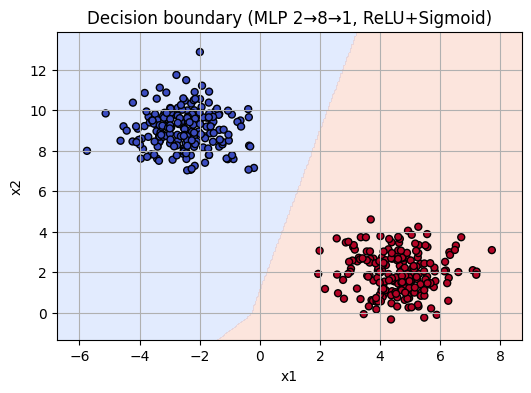

In [15]:
# PyTorch mini-challenge: classify 2D blobs with a small MLP
import numpy as np, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import torch, torch.nn as nn, torch.optim as optim

torch.manual_seed(42)
np.random.seed(42)
plt.rcParams["figure.figsize"] = (6,4); plt.rcParams["axes.grid"] = True

# ---------- Data ----------
X_np, y_np = make_blobs(n_samples=400, centers=2, cluster_std=1.0, random_state=42)
y_np = y_np.astype(np.float32).reshape(-1, 1)        # BCELoss expects shape (N,1)
X = torch.tensor(X_np, dtype=torch.float32)
y = torch.tensor(y_np, dtype=torch.float32)

# ---------- Model: 2 -> 8 -> 1 (ReLU + Sigmoid) ----------
class BlobsNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(2, 8)
        self.act = nn.ReLU()
        self.out = nn.Linear(8, 1)
        self.sigmoid = nn.Sigmoid()  # final activation for probability

    def forward(self, x):
        x = self.act(self.hidden(x))
        x = self.sigmoid(self.out(x))   # probability in [0,1]
        return x

model = BlobsNet()

# ---------- Loss & Optimizer ----------
criterion = nn.BCELoss()                 # binary cross-entropy on probabilities
optimizer = optim.Adam(model.parameters(), lr=0.05)

# ---------- Train ----------
losses = []
epochs = 300
for _ in range(epochs):
    y_pred = model(X)                    # forward
    loss = criterion(y_pred, y)          # BCE
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

print(f"Final loss: {losses[-1]:.4f}")

# ---------- Accuracy ----------
with torch.no_grad():
    probs = model(X)
    preds = (probs >= 0.5).float()
acc = (preds.eq(y).float().mean()).item()
print(f"Accuracy: {acc*100:.2f}%")

# ---------- Plot loss ----------
plt.plot(losses)
plt.xlabel("Epoch"); plt.ylabel("BCE loss"); plt.title("Training loss")
plt.show()

# ---------- Decision boundary ----------
# make a grid over the plane
x1_min, x1_max = X_np[:,0].min()-1, X_np[:,0].max()+1
x2_min, x2_max = X_np[:,1].min()-1, X_np[:,1].max()+1
xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 300),
                     np.linspace(x2_min, x2_max, 300))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

with torch.no_grad():
    zz = (model(grid) >= 0.5).float().numpy().reshape(xx.shape)

plt.contourf(xx, yy, zz, alpha=0.25, levels=[-0.5,0.5,1.5], cmap="coolwarm")
plt.scatter(X_np[:,0], X_np[:,1], c=y_np.ravel(), cmap="coolwarm", s=25, edgecolors="k")
plt.title("Decision boundary (MLP 2→8→1, ReLU+Sigmoid)")
plt.xlabel("x1"); plt.ylabel("x2")
plt.show()


Notes / Key Takeaways

nn.Module is the PyTorch template for nets.

Layers (nn.Linear) + activations (nn.ReLU, nn.Sigmoid) = building blocks.

Training loop = forward → loss → backward → step.

Optimizers simplify gradient descent.

Visualization helps you catch under/overfitting.

**1. Why does adding a nonlinear activation (ReLU) make the model more powerful than a pure linear chain?**

Because without nonlinearities, stacking layers of linear functions just collapses into *another linear function*. For example, $W_2(W_1x) = (W_2W_1)x$. That means no matter how many layers you add, the model can only learn straight-line boundaries. Nonlinear activations like ReLU “bend” the space, letting the network approximate curves and complex shapes.

---

**2. When would you prefer Adam over SGD?**
Adam is usually preferred when:

* You have noisy or sparse gradients (e.g. text, deep nets).
* You want fast convergence without too much tuning.
* You’re in early experimentation (default choice).

SGD (with momentum) can be better when:

* You have very large datasets and can afford longer training.
* You want the best generalization (SGD often edges out Adam in final test accuracy once tuned).

👉 A practical rule: start with Adam for speed, switch to SGD+momentum if you’re chasing peak accuracy.
